###### Training Neural Networks

In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets,transforms
#Define transform top normalize data
transform=transforms.Compose([transforms.ToTensor(),
                             transforms.Normalize((0.5,),(0.5,)),
                             ])
#Downloade Training data
trainset=datasets.MNIST('~/.pytorch/MNIST_data/',download=True,train=True,transform=transform)
#Load training data
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [3]:
#Build feed-forward network
model=nn.Sequential(nn.Linear(784,128),
                   nn.ReLU(),
                   nn.Linear(128,64),
                   nn.ReLU(),
                   nn.Linear(64,10))
#Define loss
criterion=nn.CrossEntropyLoss()
#Get data
images,labels=next(iter(trainloader))
#Flatten images
images=images.view(images.shape[0],-1)
#Forward pass
logits=model(images)
#Calculate loss with logits & labels
loss=criterion(logits,labels)
print(loss)

tensor(2.2979, grad_fn=<NllLossBackward>)


>**Exercise:** Build a model that returns the log-softmax as the output and calculate the loss using the negative log likelihood loss. Note that for nn.LogSoftmax and F.log_softmax you'll need to set the dim keyword argument appropriately. dim=0 calculates softmax across the rows, so each column sums to 1, while dim=1 calculates across the columns so each row sums to 1. Think about what you want the output to be and choose dim appropriately.

In [4]:
#Solutin
#Build feed-forward network
model=nn.Sequential(nn.Linear(784,128),
                   nn.ReLU(),
                   nn.Linear(128,64),
                   nn.ReLU(),
                   nn.Linear(64,10),
                   nn.LogSoftmax(dim=1))
#Define loss
criterion=nn.NLLLoss()
#Get data
images,labels=next(iter(trainloader))
#Flatten images
images=images.view(images.shape[0],-1)
#Forward pass
logps=model(images)
#Calculte logps & labels
loss=criterion(logps,labels)
print(loss)

tensor(2.3209, grad_fn=<NllLossBackward>)


###### Autograd

In [5]:
x = torch.randn(2,2, requires_grad=True)
print(x)

tensor([[ 0.1886, -1.6551],
        [ 0.6446, -2.6689]], requires_grad=True)


In [6]:
y = x**2
print(y)

tensor([[0.0356, 2.7394],
        [0.4155, 7.1230]], grad_fn=<PowBackward0>)


In [7]:
#shows the function that generated this variable
print(y.grad_fn)

In [8]:
z = y.mean()
print(z)

tensor(2.5784, grad_fn=<MeanBackward0>)


In [9]:
print(x.grad)

None


In [10]:
z.backward()
print(x.grad)
print(x/2)

tensor([[ 0.0943, -0.8276],
        [ 0.3223, -1.3344]])
tensor([[ 0.0943, -0.8276],
        [ 0.3223, -1.3344]], grad_fn=<DivBackward0>)


###### Loss and Autograd together

In [11]:
model=nn.Sequential(nn.Linear(784,128),
                   nn.ReLU(),
                   nn.Linear(128,64),
                   nn.ReLU(),
                   nn.Linear(64,10),
                   nn.LogSoftmax(dim=1))
criterion=nn.NLLLoss()
images,labels=next(iter(trainloader))
images=images.view(images.shape[0],-1)
logps=model(images)
loss=criterion(logps,labels)

In [13]:
print('Before Background pass: \n',model[0].weight.grad)
loss.backward()
print('Afer Background pass: \n',model[0].weight.grad)

Before Background pass: 
 None
Afer Background pass: 
 tensor([[-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        ...,
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        [ 0.0017,  0.0017,  0.0017,  ...,  0.0017,  0.0017,  0.0017],
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002]])


###### Training the network!

In [14]:
from torch import optim
# Optimizers require the parameters to optimize and a learning rate
optimizer=optim.SGD(model.parameters(),lr=0.01)

In [15]:
print('Initial weights - ', model[0].weight)
images, labels = next(iter(trainloader))
images.resize_(64, 784)
# Clear the gradients
optimizer.zero_grad()
#Forward pass
output = model(images)
loss = criterion(output, labels)
#Backward pass
loss.backward()
#update weights
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0124, -0.0115, -0.0264,  ...,  0.0204,  0.0273, -0.0343],
        [ 0.0097,  0.0126, -0.0218,  ..., -0.0023,  0.0341, -0.0125],
        [ 0.0227,  0.0177, -0.0086,  ...,  0.0219,  0.0022, -0.0006],
        ...,
        [-0.0189, -0.0268,  0.0257,  ...,  0.0314, -0.0098, -0.0316],
        [-0.0266,  0.0098,  0.0020,  ...,  0.0066,  0.0218, -0.0272],
        [-0.0048, -0.0341,  0.0226,  ..., -0.0274, -0.0183,  0.0240]],
       requires_grad=True)
Gradient - tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0022, -0.0022, -0.0022,  ..., -0.0022, -0.0022, -0.0022],
        [-0.0031, -0.0031, -0.0031,  ..., -0.0031, -0.0031, -0.0031],
        ...,
        [ 0.0015,  0.0015,  0.0015,  ...,  0.0015,  0.0015,  0.0015],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002]])


###### Training for real

>**Exercise:** Implement the training pass for our network. If you implemented it correctly, you should see the training loss drop with each epoch.

In [16]:
#Solution
#Build feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
#Define loss
criterion = nn.NLLLoss()
#Optimizers to update the weights with the gradients
optimizer = optim.SGD(model.parameters(), lr=0.003)
epochs = 5
for e in range(epochs):
    running_loss = 0
    #Get data
    for images, labels in trainloader:
        #Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        #Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        #Backward pass
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8736616794996932
Training loss: 0.7996409829300858
Training loss: 0.5022600839641302
Training loss: 0.41437175220200245
Training loss: 0.3730670227361386


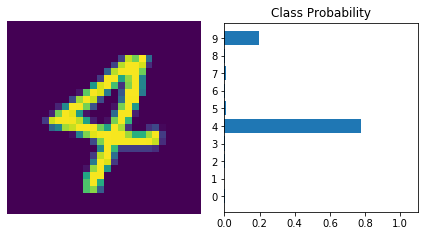

In [17]:
%matplotlib inline
import helper
images, labels = next(iter(trainloader))
img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)
# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)